In [52]:
# Imports
import os
import yaml
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from PIL import Image

In [2]:
# Settings
total_images = 5000
training_split = 0.8
validation_split = 0.1 # Taken from training split
image_size = (64, 64)
highest_point = 116

In [3]:
# Collect Images
dataset_path = os.path.join(os.getcwd(), 'dataset')
image_paths = random.sample(glob.glob(os.path.join(dataset_path, '*.jpg')), total_images)

In [4]:
"""
Data Syntax
{
	path: <path to image>,
	age: <age> (First number in file name)
	gender: <gender> (0: Male, 1: Female; Apparent) (Secondary number in file name)
}
"""
data = []

for image_path in image_paths:
	image_name = os.path.basename(image_path)
	age = int(image_name.split('_')[0])
	gender = int(image_name.split('_')[1])
	data.append({
		'path': image_path,
		'age': age,
		'gender': gender
	})

In [5]:
# Data Processing
x = []
y = []

for data_point in data:
	img = Image.open(data_point['path']).resize(image_size)
	x.append(np.array(img))

	label = np.zeros(highest_point)
	label[data_point['age']] = 1
	y.append(label)
	

In [6]:
# Data Spliting
training_data_x = np.array(x[:round(len(data) * training_split)])
testing_data_x = np.array(x[round(len(data) * training_split):])

training_data_y = np.array(y[:round(len(data) * training_split)])
testing_data_y = np.array(y[round(len(data) * training_split):])

In [7]:
# Model

model = keras.Sequential()

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', input_shape = (image_size[0], image_size[1], 3)))
model.add(Flatten())
model.add(Dense(highest_point, activation='softmax'))

In [8]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 64)        4864      
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 116)               26726516  
Total params: 26,731,380
Trainable params: 26,731,380
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train Model
model.fit(training_data_x, training_data_y, epochs=5, batch_size=64)

Epoch 1/5
63/63 [==============================] - 10s 166ms/step - loss: 0.0130 - accuracy: 0.8487
Epoch 2/5
63/63 [==============================] - 10s 165ms/step - loss: 0.0080 - accuracy: 0.9170
Epoch 3/5
63/63 [==============================] - 10s 159ms/step - loss: 0.0053 - accuracy: 0.9500
Epoch 4/5
63/63 [==============================] - 11s 167ms/step - loss: 0.0045 - accuracy: 0.9685
Epoch 5/5
63/63 [==============================] - 10s 163ms/step - loss: 0.0031 - accuracy: 0.9772


Prediction 38
age 40
apprent gender female
image size (64, 64)


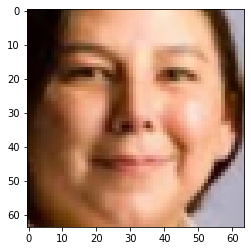

In [50]:
# Test Model
test_d = random.randint(0, len(testing_data_x) - 1)
print('prediction', np.argmax(model.predict(testing_data_x[test_d].reshape(1, image_size[0], image_size[1], 3))[0]))

a = data[test_d]
img = Image.open(a['path']).resize((64, 64))
plt.imshow(img)
print(f'age {a["age"]}')
print(f'apprent gender {"male" if a["gender"] == 0 else "female"}')
print(f'image size {img.size}')

In [11]:
a = random.choice(data)
